In [13]:
!pip install import-ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00


In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

importing Jupyter notebook from data_exploration.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of emotional reactions data: (3084, 14)
There are 2979 unique sp_id and 2979 unique seeker_post.
There are 3023 unique rp_id and 3022 unique response_post.


There are 121 duplicate sp_id, rp_id, seeker_post,and response_post pairings. They seem to comprise of completely
duplicated rows, slight differences in rationale punctuation, phrase differences in rationales, and differing scored empathy levels.


There are 0 rows with a level = 0 and a rationale.
There are 2 rows with a level = 1 or level = 2 and no rationale.
We can see that we definitely have unbalanced data. TODO talk to Mark about this? It could be a case to just try to determine rationales instead of predicting empathy level.
Statistics for seeker and response post lengths
There are 13 rationles that could not be found, likely due to a t

<string>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Shape of explorations data: (3084, 14)
Shape of explorations data: (3084, 14)


NameError: ignored

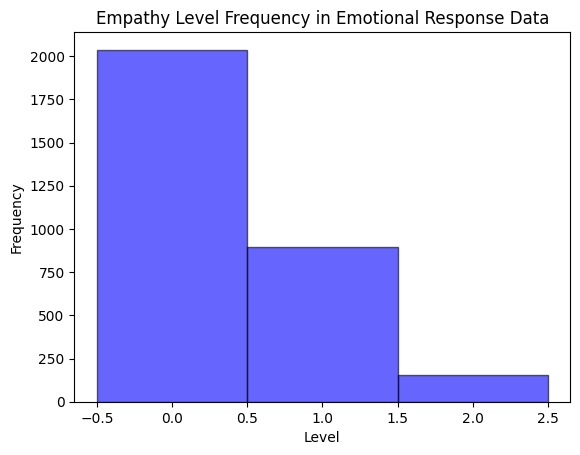

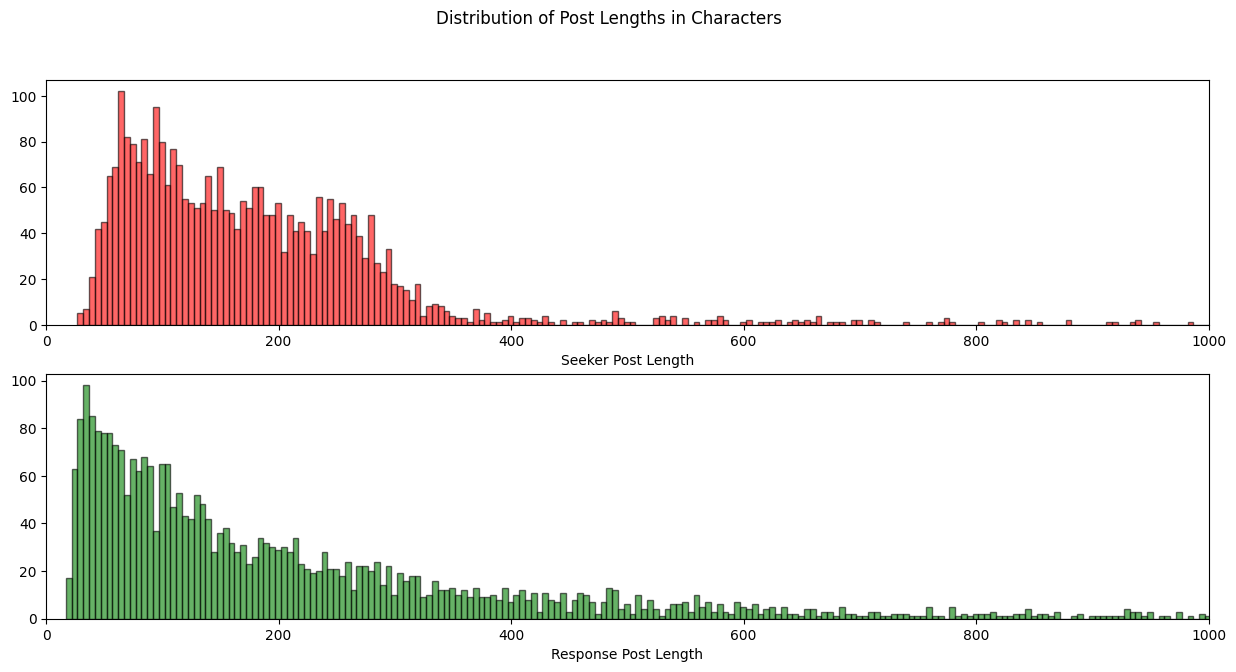

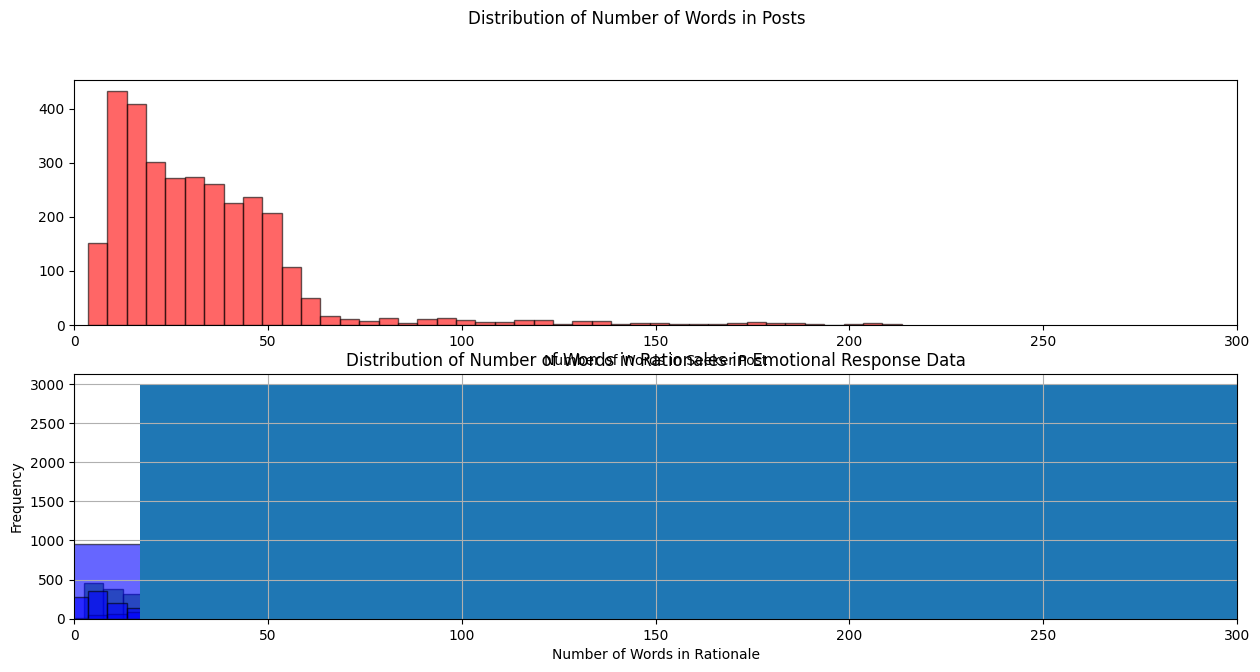

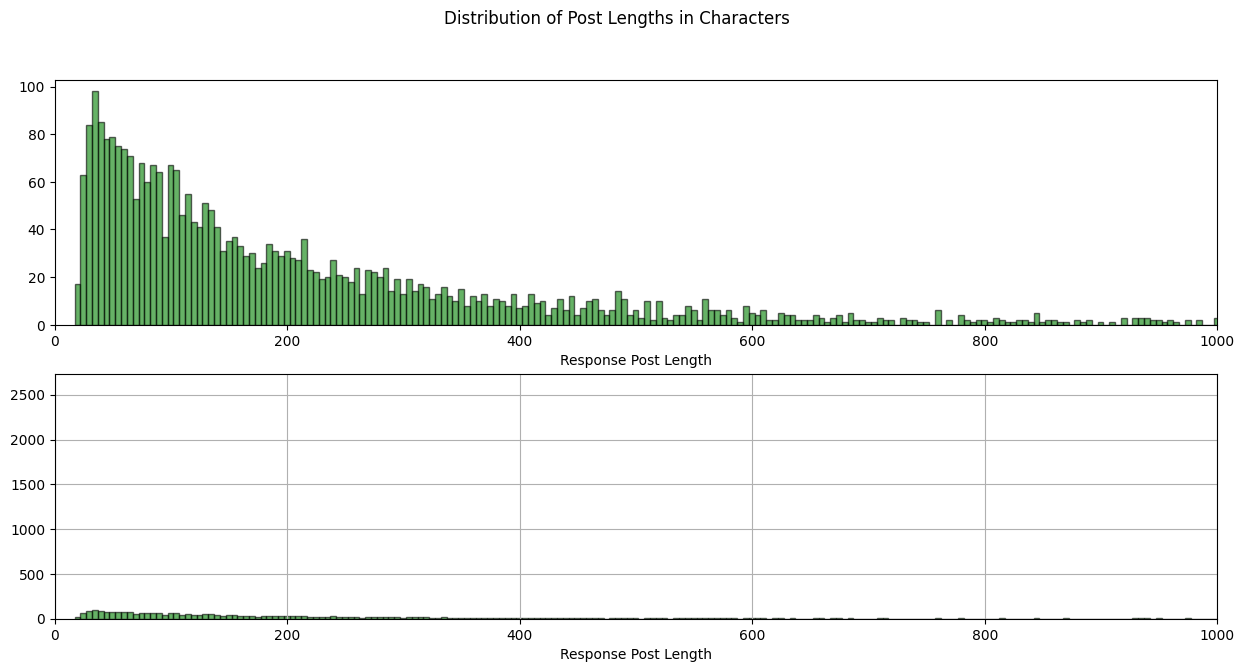

In [14]:
import data_exploration

In [16]:
data_exploration.em_df

NameError: ignored

In [4]:
cd /content/drive/MyDrive/266 Final Project/Code

/content/drive/MyDrive/266 Final Project/Code


In [ ]:
# change this to the code folder in your drive
home_dir = Path('/content/drive/MyDrive/266 Final Project/Code')
sample_train_data = home_dir / 'data' / 'sample_input_ER.csv'
em_data_path =  home_dir / 'data' / 'emotional-reactions-reddit.csv'
ex_data_path = home_dir / 'data' / 'explorations-reddit.csv'
in_data_path = home_dir / 'data' / 'interpretations-reddit.csv'

In [ ]:





# Load your dataset
# Assuming you have a DataFrame with 'text' and 'label' columns
# Adjust the column names accordingly
# For simplicity, let's assume your labels are in the 'label' column and range from 0 to 2 for the three levels

# Example:
# df = pd.read_csv('your_dataset.csv')
# X = df['text']
# y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to a bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))